In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import math
import os
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from icecream import ic
from sklearn.datasets import load_iris
import zipfile as zp
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [3]:
spotify_df=pd.read_csv("D:/HALDEN/downloads/dataset.csv")
ic(spotify_df.shape)
spotify_df.head()

ic| spotify_df.shape: (114000, 21)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [29]:
new_spot_df=spotify_df.drop(["track_id",'album_name',"track_genre"],axis=1)

In [25]:
le=LabelEncoder()

In [33]:
track_g=le.fit_transform(spotify_df["track_genre"])

In [34]:
new_spot_df["track_le"]=track_g

In [35]:
new_spot_df

,Unnamed: 0,artists,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_le
0,0,Gen Hoshino,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0
1,1,Ben Woodward,Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0
2,2,Ingrid Michaelson;ZAYN,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0
3,3,Kina Grannis,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0
4,4,Chord Overstreet,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,Rainy Lullaby,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,113
113996,113996,Rainy Lullaby,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,113
113997,113997,Cesária Evora,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,113
113998,113998,Michael W. Smith,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,113


In [4]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
spotify_df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

there seem to be a few missing parameters

In [6]:
spotify_df.nunique()

Unnamed: 0          114000
track_id             89741
artists              31437
album_name           46589
track_name           73608
popularity             101
duration_ms          50697
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45653
time_signature           5
track_genre            114
dtype: int64

In [7]:
spotify_df["mode"].value_counts()

1    72681
0    41319
Name: mode, dtype: int64

In [9]:
spotify_df.duplicated().value_counts()

False    114000
dtype: int64

visualization

<AxesSubplot:>

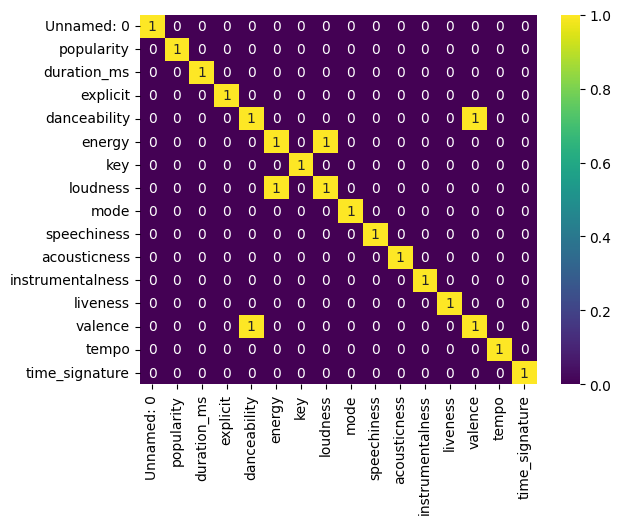

In [14]:
sns.heatmap(spotify_df.corr()>0.4,cmap='viridis',annot=True)

there is a high correlation between dancability and valence
there is also a high correlation between loudness and energy

<AxesSubplot:>

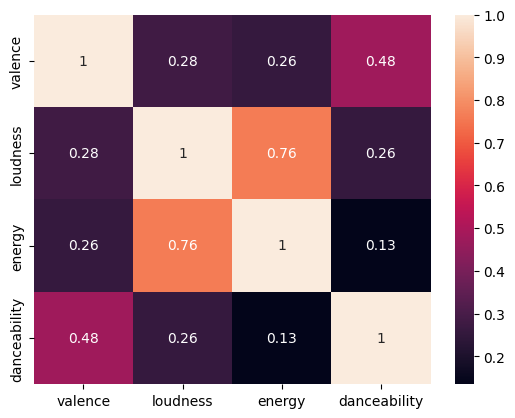

In [15]:
df_heatmap=spotify_df[['valence','loudness','energy','danceability']].corr()
sns.heatmap(df_heatmap,annot=True)

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'time_signature'}>, <AxesSubplot:>]],
      dtype=object)

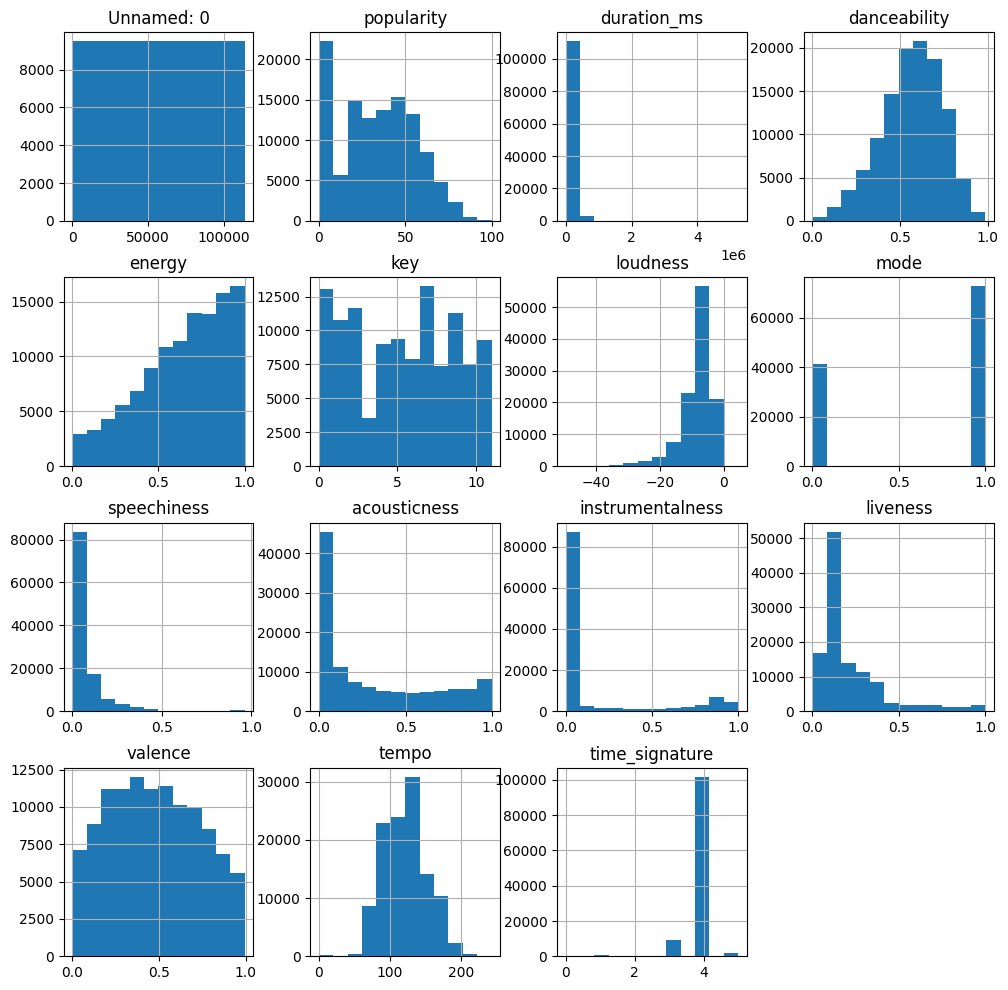

In [20]:
spotify_df.hist(figsize=(12,12),bins=12)

In [36]:
x=new_spot_df.drop("track_name",axis=1)
y=new_spot_df["track_name"]

In [37]:
x

,Unnamed: 0,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_le
0,0,Gen Hoshino,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0
1,1,Ben Woodward,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0
2,2,Ingrid Michaelson;ZAYN,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0
3,3,Kina Grannis,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0
4,4,Chord Overstreet,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,Rainy Lullaby,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,113
113996,113996,Rainy Lullaby,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,113
113997,113997,Cesária Evora,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,113
113998,113998,Michael W. Smith,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,113


In [23]:
new_spot_df.head(5)

,Unnamed: 0,artists,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,Ben Woodward,Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,Kina Grannis,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
steps=[("imputer" ,SimpleImputer(strategy='median') ),
       ("labelencoder",LabelEncoder()),
       ("scaler",MinMaxScaler()),
       ("decompose",PCA(n_components=8))
       
       
       ]

sp_pipeline=Pipeline(steps)

In [38]:
le=LabelEncoder()
x["artists"]=le.fit_transform(x['artists'])
mms=MinMaxScaler()
x=mms.fit_transform(x)
pca=PCA(n_components=8)
x=pca.fit_transform(x)

x[23,:].reshape(-1,1)

array([[-0.40291576],
       [-0.39536878],
       [ 0.56018923],
       [-0.09729387],
       [-0.31460732],
       [ 0.06299249],
       [-0.20487043],
       [ 0.08279498]])

cosine similarity 

In [85]:
import numpy
from icecream import ic

def cosine_similarity(a,b):
       
        sum_root_a=0
        sum_root_b=0
        
        dict_a={} # A dictionary that has the word count of words in string a
        dict_b={} #the same for string b
        new=[] # a list of all appearing words in the both dictionaries
        sum_of_product_ab=0
        for word in a.split():
            if word in dict_a and word in a:
                dict_a[word]+=1
           
            elif word in a:
                dict_a[word]=1
            if word not in new:
                new.append(word)
                
        for word in b.split():
            if word in dict_b and word in b:
                dict_b[word]+=1
           
            elif word in b:
                dict_b[word]=1
            if word not in new:
                new.append(word)    
                
        print(dict_a,dict_b)
        
        for i in range(len(new)):
            if new[i] in dict_a and new[i] in dict_b:
                  sum_of_product_ab+=(dict_a[new[i]]*dict_b[new[i]])
           
                
            else:
                sum_of_product_ab+=0
            
            if new[i] in dict_a and new[i] in dict_b:
                sum_root_a+=((dict_a[new[i]])**2)
                sum_root_b+=((dict_b[new[i]])**2)
                
            elif new[i] in dict_a and new[i] not in dict_b:  
                sum_root_a+=(dict_a[new[i]]**2)  
            elif new[i] in dict_b and new[i] not in dict_a:
                sum_root_b+=dict_b[new[i]]**2
            
            else:
                sum_root_a+=0
                sum_root_b+=0
                
        sq_a=numpy.sqrt(sum_root_a)
        sq_b=numpy.sqrt(sum_root_b)
        
        cosine_similarity=sum_of_product_ab/(sq_a*sq_b)
        
        return ic(cosine_similarity)


a="this is a nice day we are having today"
b='this is , i just hope a  rain cloud does not come pouring'
cosine_similarity(a,b)
        
        


ic| cosine_similarity: 0.2773500981126146


{'this': 1, 'is': 1, 'a': 1, 'nice': 1, 'day': 1, 'we': 1, 'are': 1, 'having': 1, 'today': 1} {'this': 1, 'is': 1, ',': 1, 'i': 1, 'just': 1, 'hope': 1, 'a': 1, 'rain': 1, 'cloud': 1, 'does': 1, 'not': 1, 'come': 1, 'pouring': 1}


0.2773500981126146

{'hello': 1, 'this': 1, 'is': 1, 'a': 1, 'world': 1, 'of': 1, 'fun': 1}


In [ ]:
def cosine_similarity(A,B):
    